# Tutorial 10 A Reduction

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans # clustering
from sklearn.metrics import silhouette_score # clustering
from sklearn.manifold import TSNE 

### 1. Read in all data and create summary dataframe

In [2]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
print(data.head())

exit_rate = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageExitRate.csv', index_col=0)
page_revenue = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageRevenue.csv', index_col=0)
page_size = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSize.csv', index_col=0)
page_speed = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSpeed.csv', index_col=0)
page_viewing_time = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageViewingTime.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns) # data frame creation
summary_data['Exit'] = exit_rate.values
summary_data['Revenue'] = page_revenue.values
summary_data['Hits'] = data.sum().values
summary_data['Size'] = page_size.values
summary_data['Download'] = page_speed.values
summary_data['Viewing'] = page_viewing_time.values
print(summary_data.head())

             001  002  003  004  005  006  007  008  009  010  ...  158  159  \
Date                                                           ...             
2019-01-01  1062   33   67   42    0    4    0    0    1   69  ...    0    0   
2019-01-02   976   41   72   19    2    0    0   14    1   62  ...    5    0   
2019-01-03   956   27   71   28    4    6   11    0    0   64  ...    0    0   
2019-01-04   976   30   57   29    0    0    3    0    2   52  ...    0    2   
2019-01-05   956   45   65   27    4    1    0    0    0   55  ...   12    0   

            160  161  162  163  164  165  166  167  
Date                                                
2019-01-01    4    0   10    2    2    2    0    0  
2019-01-02    0    7    0    0    0    0    1    3  
2019-01-03    0    0    6    0    0    3    0    0  
2019-01-04    0    0    0    0    0    0    0    7  
2019-01-05    0    4    0    0    0    0    5    2  

[5 rows x 167 columns]
          Exit      Revenue    Hits        S

### 2. Cluster data using k-means with k=4

cluster0 = ['005', '006', '007', '008', '009', '011', '012', '013', '014', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '

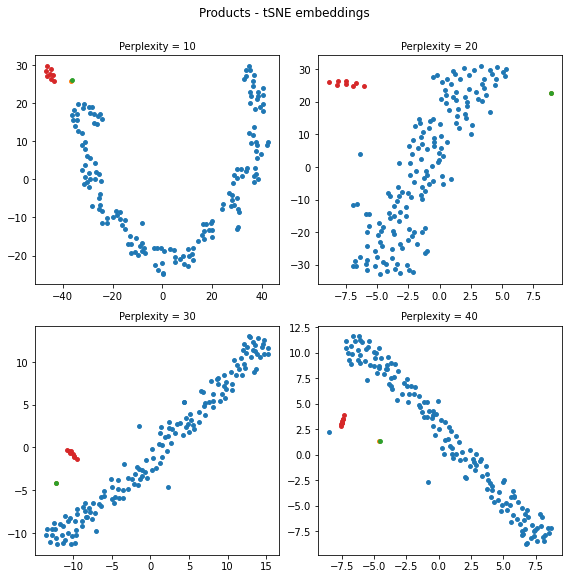

In [3]:
k = 4
raw_data = summary_data
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required
annotate = True
perplexities = [10,20,30,40]

clusters = []
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
raw_data['label'] = k_means.fit_predict(raw_data)
for c in range(k):
    cluster = raw_data[raw_data['label'] == c]
    print('cluster' + str(c) + ' = ' + str(list(cluster.index)))
    clusters.append(cluster.drop(['label'], axis=1))
clustered_data = pd.concat(clusters)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Products - tSNE embeddings', position=(0.5, 1.0))
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(clustered_data.values)
    embedded_clusters = []
    cluster_start = 0
    for cluster in clusters:
        cluster_end = cluster_start + cluster.shape[0]
        embedded_clusters.append(embedding[cluster_start:cluster_end, :])
        cluster_start = cluster_end
    sub = fig.add_subplot(2, 2, counter)
    sub.set_title('Perplexity = ' + str(p), fontsize=10)
    for embedded_cluster in embedded_clusters:
        sub.scatter(embedded_cluster[:, 0], embedded_cluster[:, 1], s=15)
    #if annotate:
    #    for i, name in enumerate(clustered_data.index):
    #        sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

#### Using k-means = 4, there are four distinct clusters that have been made, clusters 1 and 2 coloured orange and green are the very high volume pages, cluster 3 coloured red in the scatter plot is the medium volume pages and then everything else is in cluster 0 coloured blue.

### 3. Drop high and medium volume pages and repeat 

In [4]:
rows = ["001"  , "015"] + ["002" , "003" , "004", "010", "048", "080", "155", "156"] # high and medium volume pages
raw_data = raw_data.drop(index=rows) # drop the high and medium volume pages from the dataframe

In [5]:
print(raw_data) # print dataframe

          Exit    Revenue  Hits        Size   Download     Viewing  label
005  45.828504   3.060067   533   43.593542   5.622858   12.522355      0
006   3.930004   4.609265   780  112.012067  12.058935  151.230207      0
007   7.387575   6.623281  1096   39.350602   2.632501   62.341232      0
008  27.891932   9.161146  1487  113.339761  13.204977   99.262822      0
009  48.680397   4.799370   575   72.959544   4.747356   20.029018      0
..         ...        ...   ...         ...        ...         ...    ...
163  21.610739   3.667653   872   37.416209   2.433619   29.321645      0
164  62.449320   2.642696   360   79.780979   5.813870   63.454881      0
165  74.555378   4.009169   685  114.168550   6.977834  162.698370      0
166  72.797027   4.719123   966   99.850368  11.557195   48.100218      0
167  46.911265  11.031914  1196   38.516566   2.672650   37.694302      0

[157 rows x 7 columns]


cluster0 = ['008', '017', '018', '021', '025', '028', '034', '037', '038', '041', '045', '051', '055', '062', '067', '071', '075', '078', '084', '088', '092', '097', '104', '108', '114', '118', '121', '122', '125', '130', '133', '134', '137', '141', '147', '151', '158', '167']
cluster1 = ['006', '013', '014', '016', '023', '027', '031', '032', '043', '047', '049', '053', '056', '060', '065', '066', '069', '073', '076', '083', '086', '090', '099', '110', '112', '116', '120', '127', '128', '132', '139', '143', '145', '149', '152', '161', '162', '163', '165']
cluster2 = ['005', '009', '012', '019', '022', '026', '029', '030', '035', '039', '042', '046', '052', '059', '063', '064', '068', '072', '079', '081', '082', '085', '089', '093', '098', '101', '102', '105', '106', '109', '115', '119', '123', '126', '131', '135', '138', '142', '144', '148', '159', '160', '164']
cluster3 = ['007', '011', '020', '024', '033', '036', '040', '044', '050', '054', '057', '058', '061', '070', '074', '077', 

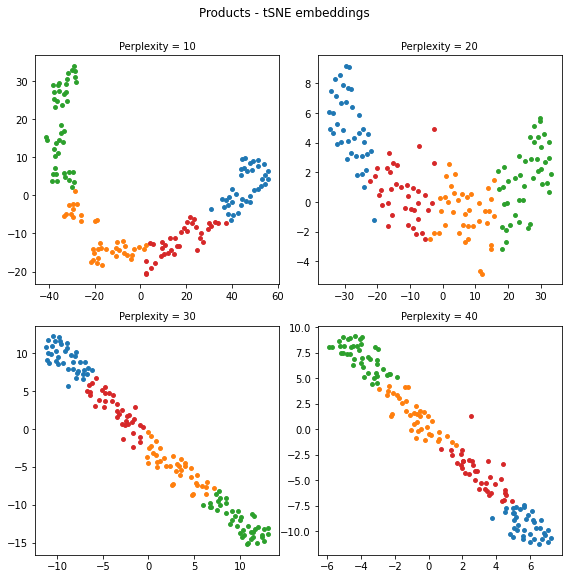

In [6]:
k = 4
#raw_data = summary_data
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required
annotate = True
perplexities = [10,20,30,40]

clusters = []
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
raw_data['label'] = k_means.fit_predict(raw_data)
for c in range(k):
    cluster = raw_data[raw_data['label'] == c]
    print('cluster' + str(c) + ' = ' + str(list(cluster.index)))
    clusters.append(cluster.drop(['label'], axis=1))
clustered_data = pd.concat(clusters)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Products - tSNE embeddings', position=(0.5, 1.0))
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(clustered_data.values)
    embedded_clusters = []
    cluster_start = 0
    for cluster in clusters:
        cluster_end = cluster_start + cluster.shape[0]
        embedded_clusters.append(embedding[cluster_start:cluster_end, :])
        cluster_start = cluster_end
    sub = fig.add_subplot(2, 2, counter)
    sub.set_title('Perplexity = ' + str(p), fontsize=10)
    for embedded_cluster in embedded_clusters:
        sub.scatter(embedded_cluster[:, 0], embedded_cluster[:, 1], s=15)
    #if annotate:
    #    for i, name in enumerate(clustered_data.index):
    #        sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()